In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

# Load dataset
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
# Ukuran dataset
print("Jumlah data:", df.shape[0])
print("Jumlah fitur:", df.shape[1])

# Info dataset
df.info()

# Statistik deskriptif
df.describe()


Jumlah data: 5110
Jumlah fitur: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
# Hapus kolom id karena tidak relevan
df.drop('id', axis=1, inplace=True)

# Cek missing value
print("Missing values per kolom:\n", df.isnull().sum())

# Tangani missing value pada kolom 'bmi'
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Encode kolom kategorikal
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    df[col] = le.fit_transform(df[col])

# Normalisasi fitur numerik
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Tampilkan dataset setelah preprocessing
df.head()


Missing values per kolom:
 gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<ipython-input-3-57c3d6a45233>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051434,0,1,1,2,1,2.706375,1.001234e+00,1,1
1,0,0.786070,0,0,1,3,0,2.121559,4.615554e-16,2,1
2,1,1.626390,0,1,1,2,0,-0.005028,4.685773e-01,2,1
3,0,0.255342,0,0,1,2,1,1.437358,7.154182e-01,3,1
4,0,1.582163,1,0,1,3,0,1.501184,-6.357112e-01,2,1


In [4]:
# Fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan training model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [5]:
# Prediksi
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[921  39]
 [ 52  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.20      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022

Akurasi: 0.910958904109589


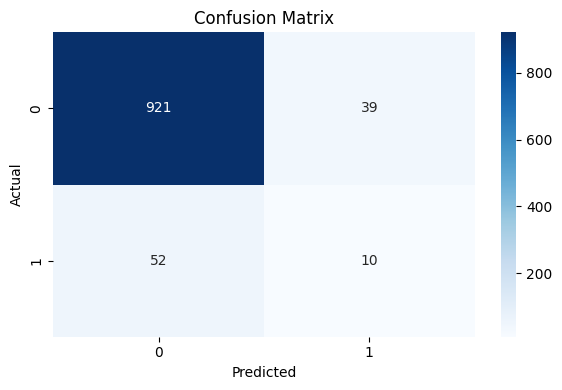

In [6]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Simpan sebagai PNG
plt.savefig("confusion_matrix.png")
plt.show()


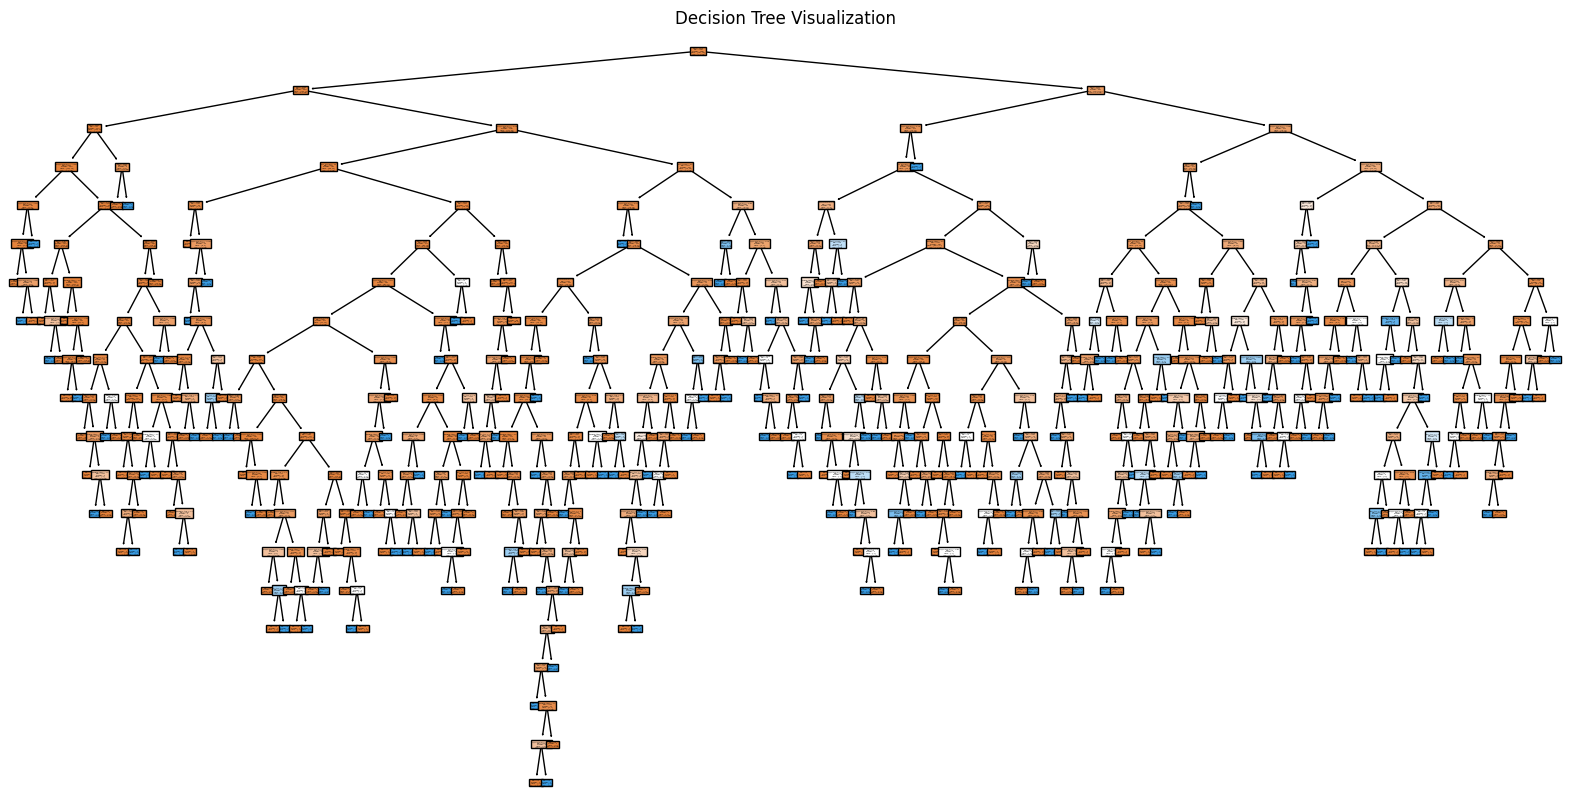

In [7]:
# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=["No Stroke", "Stroke"], filled=True)
plt.title("Decision Tree Visualization")
plt.savefig("decision_tree.png")
plt.show()


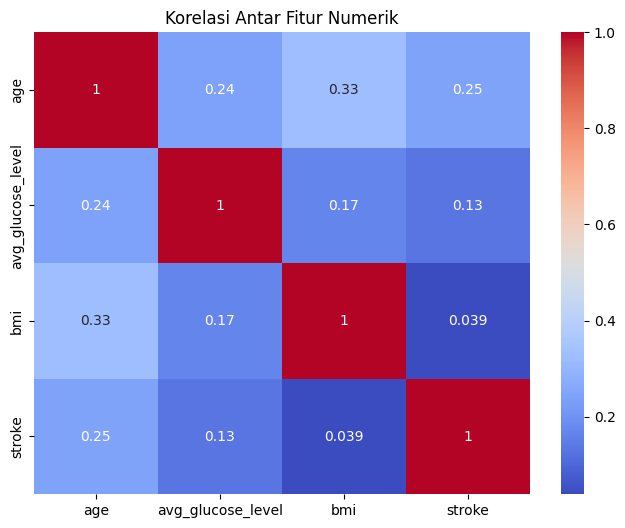

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.savefig("korelasi_numerik.png")
plt.show()


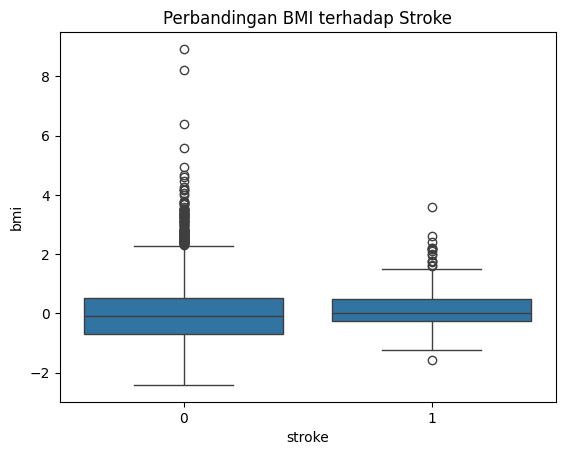

In [11]:
sns.boxplot(x='stroke', y='bmi', data=df)
plt.title("Perbandingan BMI terhadap Stroke")
plt.savefig("boxplot_bmi.png")
plt.show()


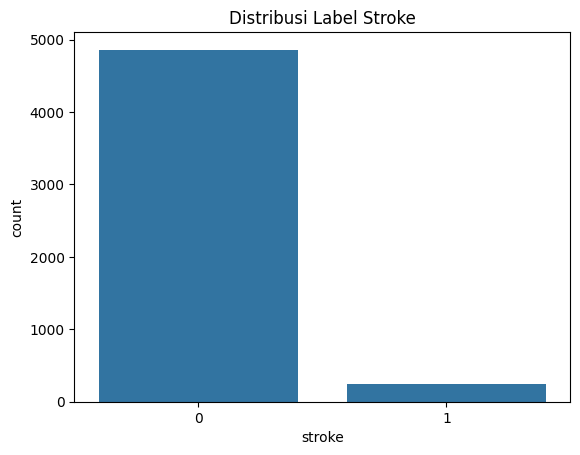

In [12]:
sns.countplot(x='stroke', data=df)
plt.title("Distribusi Label Stroke")
plt.savefig("label_distribusi.png")
plt.show()
